In [ ]:
# based off of: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

In [1]:
from skimage import io, color
from skimage.transform import resize

In [2]:
import os 
from skimage import io

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

int_translator = {}
for i, genre in enumerate(genres):
    int_translator[i] = genre

# Load files
image_list = []
labels = []

for label, genre in enumerate(genres):
    list_files = os.listdir('../mel-grams/' + genre)
    for filename in list_files:
        image_list.append(io.imread('../mel-grams/' + genre + '/' + filename))
        labels.append(label)


In [3]:
from skimage import io, color
from skimage.transform import resize

def image_processor(img):
    #img = color.rgb2gray(color.rgba2rgb(img))
    #img = resize(img, (235,500))
    img = img.reshape(-1)
    return img

# flatten images
image_list = [image_processor(image) for image in image_list]

In [4]:
from skimage import io, color
from skimage.transform import resize

def image_processor(img):
    #img = color.rgb2gray(color.rgba2rgb(img))
    #img = resize(img, (235,500))
    img = img.reshape(-1)
    return img

# flatten images
image_list = [image_processor(image) for image in image_list]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    image_list, labels, test_size=0.2, shuffle=True)

In [6]:
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train, y_train)

SVC()

In [8]:
from sklearn import metrics

predicted = sv.predict(X_test)
print(f"Classification report for classifier {sv}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.17      0.05      0.07        22
           1       0.47      0.74      0.57        19
           2       0.23      0.16      0.19        19
           3       0.22      0.10      0.14        20
           4       0.47      0.43      0.45        21
           5       0.33      0.22      0.27        18
           6       0.68      0.78      0.72        27
           7       0.46      0.82      0.59        22
           8       0.38      0.17      0.23        18
           9       0.15      0.36      0.21        14

    accuracy                           0.40       200
   macro avg       0.36      0.38      0.34       200
weighted avg       0.37      0.40      0.36       200




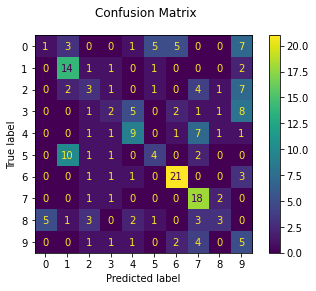

In [10]:
import matplotlib.pyplot as plt

disp = metrics.plot_confusion_matrix(sv, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [14]:
sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}